In [13]:
import numpy as np
from cmath import nan
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


data=pd.read_csv('data.csv')
us=pd.read_csv('uszips.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96753 non-null  int64  
 1   Cardnum            96753 non-null  int64  
 2   Date               96753 non-null  object 
 3   Merchnum           93374 non-null  object 
 4   Merch description  96753 non-null  object 
 5   Merch state        95551 non-null  object 
 6   Merch zip          92094 non-null  float64
 7   Transtype          96753 non-null  object 
 8   Amount             96753 non-null  float64
 9   Fraud              96753 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.4+ MB
None


In [14]:
'''FILL MERCH STATE'''
print(np.count_nonzero(data['Merch state'].isnull().values))
zip_dict = pd.Series(us.state_id.values,index=us.zip.values).to_dict()
data.loc[data['Merch state'].isnull(),'Merch state'] = data['Merch zip'].map(zip_dict)
print(np.count_nonzero(data['Merch state'].isnull().values))

1202
1149


In [15]:
'''FILL MERCH ZIP'''
print(np.count_nonzero(data['Merch zip'].isnull().values))
state_dict = pd.Series(us.zip.values,index=us.state_id.values).to_dict()
data.loc[data['Merch zip'].isnull(),'Merch zip'] = data['Merch state'].map(state_dict)
print(np.count_nonzero(data['Merch zip'].isnull().values))

4659
1481


In [16]:
'''FILL MERCH NUM'''
print(np.count_nonzero(data['Merchnum'].isnull().values))
desc_dict = pd.Series(data.Merchnum.values,index=data['Merch description'].values).to_dict()
data.loc[data['Merchnum'].isnull(),'Merchnum'] = data['Merch description'].map(desc_dict)
print(np.count_nonzero(data['Merchnum'].isnull().values))

3379
3001


In [17]:
'''FILL MERCH NUM
print(np.count_nonzero(data['Merchnum'].isnull().values))
zip1_dict = pd.Series(data.Merchnum.values,index=data['Merch zip'].values).to_dict()
data.loc[data['Merchnum'].isnull(),'Merchnum'] = data['Merch zip'].map(zip1_dict)
print(np.count_nonzero(data['Merchnum'].isnull().values))
'''

"FILL MERCH NUM\nprint(np.count_nonzero(data['Merchnum'].isnull().values))\nzip1_dict = pd.Series(data.Merchnum.values,index=data['Merch zip'].values).to_dict()\ndata.loc[data['Merchnum'].isnull(),'Merchnum'] = data['Merch zip'].map(zip1_dict)\nprint(np.count_nonzero(data['Merchnum'].isnull().values))\n"

In [18]:
'''REMOVE NULL AND DUPLICATE'''
data['Merch zip'].replace('', np.nan, inplace=True)
data.dropna(subset=['Merch zip'], inplace=True)

data['Merch state'].replace('', np.nan, inplace=True)
data.dropna(subset=['Merch state'], inplace=True)

data['Merchnum'].replace('', np.nan, inplace=True)
data.dropna(subset=['Merchnum'], inplace=True)

print(np.count_nonzero(data.isnull().values))
print(len(data))

data.drop_duplicates(subset=['Cardnum', 'Merchnum','Merch description','Amount','Date','Merch state'],keep='first',inplace=True)
print(len(data))

0
93458
87014


In [19]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87014 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             87014 non-null  int64  
 1   Cardnum            87014 non-null  int64  
 2   Date               87014 non-null  object 
 3   Merchnum           87014 non-null  object 
 4   Merch description  87014 non-null  object 
 5   Merch state        87014 non-null  object 
 6   Merch zip          87014 non-null  float64
 7   Transtype          87014 non-null  object 
 8   Amount             87014 non-null  float64
 9   Fraud              87014 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.3+ MB
None


In [20]:

# Convert categorical data into numerical data

encoder=preprocessing.LabelEncoder()
data['Merch description']=encoder.fit_transform(data['Merch description'])
print(data['Merch description'])


data['Recnum']=encoder.fit_transform(data['Recnum'])
print(data['Recnum'])


data['Cardnum']=encoder.fit_transform(data['Cardnum'])
print(data['Cardnum'])

data['Merchnum']=encoder.fit_transform(data['Merchnum'])
print(data['Merchnum'])

data['Date']=encoder.fit_transform(data['Date'])
print(data['Date'])

data['Merch state']=encoder.fit_transform(data['Merch state'])
print(data['Merch state'])

data['Merch zip']=encoder.fit_transform(data['Merch zip'])
print(data['Merch zip'])


data['Transtype']=encoder.fit_transform(data['Transtype'])
print(data['Transtype'])


data['Amount']=encoder.fit_transform(data['Amount'])
print(data['Amount'])


print(data.info())
#data.to_csv('new.csv')

0         4382
2         8014
5         4380
6         4386
7         7146
         ...  
96748     1461
96749     6872
96750    10718
96751     2008
96752    10394
Name: Merch description, Length: 87014, dtype: int32
0            0
2            1
5            2
6            3
7            4
         ...  
96748    87009
96749    87010
96750    87011
96751    87012
96752    87013
Name: Recnum, Length: 87014, dtype: int64
0         657
2         177
5         318
6         645
7         662
         ... 
96748    1333
96749     946
96750     951
96751    1096
96752    1083
Name: Cardnum, Length: 87014, dtype: int64
0        2530
2        1846
5        2530
6        2530
7        3171
         ... 
96748    1365
96749    4846
96750    1844
96751    5062
96752    5677
Name: Merchnum, Length: 87014, dtype: int32
0          0
2          0
5          0
6          0
7          0
        ... 
96748    364
96749    364
96750    364
96751    364
96752    364
Name: Date, Length: 87014, dtype: int

In [21]:
# Splitting data
'''
non_fraud= data[data.Fraud == 0]
fraud= data[data.Fraud == 1]

print(non_fraud.shape)
print(fraud.shape)

non_fraud_sample=non_fraud.sample(n=1059)

new_dataset=pd.concat([non_fraud_sample,fraud],axis=0)
print(new_dataset.head())

print(new_dataset['Fraud'].value_counts())

x= new_dataset.drop(columns='Fraud',axis=1)
y=new_dataset['Fraud']'''

"\nnon_fraud= data[data.Fraud == 0]\nfraud= data[data.Fraud == 1]\n\nprint(non_fraud.shape)\nprint(fraud.shape)\n\nnon_fraud_sample=non_fraud.sample(n=1059)\n\nnew_dataset=pd.concat([non_fraud_sample,fraud],axis=0)\nprint(new_dataset.head())\n\nprint(new_dataset['Fraud'].value_counts())\n\nx= new_dataset.drop(columns='Fraud',axis=1)\ny=new_dataset['Fraud']"

In [22]:
# Splitting data
x= data.drop(columns='Fraud',axis=1)
y=data['Fraud']

X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(69611, 9)
(17403, 9)
(69611,)
(17403,)


In [23]:
#DATA NORMALIZATION

#X_TRAIN
standard = StandardScaler()
x_train = standard.fit_transform(X_train)
x_train_norm=pd.DataFrame(x_train)
print(x_train_norm[:10],'\n\n')

#X_TEST
x_test = standard.fit_transform(X_test)
x_test_norm=pd.DataFrame(x_test)
print(x_test_norm[:10],'\n\n')

          0         1         2         3         4         5         6  \
0 -1.326050  0.397987 -0.014127  0.976377 -1.217093  1.480899  0.369700   
1  0.074134 -1.276298 -1.227074 -0.936624  0.563742 -0.448592 -0.851712   
2  0.074930 -1.262287 -1.227074 -1.381520  0.836757  1.281297 -0.711225   
3  0.721818  0.253209  1.714561  0.688566  0.100208 -0.847797  0.619272   
4  0.080976  0.318593 -1.112465  0.702015 -0.352939  0.882091 -1.606210   
5  1.053297  1.539863  1.428038 -1.381520  0.836757  1.281297 -0.711225   
6  0.202303  0.227523  0.262845  1.209853 -0.541082  1.081694 -0.061678   
7 -0.810353  0.547435 -1.026508 -1.130829  1.123127 -1.513139  1.410958   
8 -1.706338  0.229858 -1.284379 -0.364768  0.438214 -1.313537 -0.931872   
9 -0.980290  0.456365  0.683078  0.473380  1.645418 -0.515126 -1.714468   

         7         8  
0  0.00379 -0.443015  
1  0.00379 -1.188477  
2  0.00379 -0.810108  
3  0.00379 -0.196032  
4  0.00379  1.255476  
5  0.00379 -0.355066  
6  0.00379 -0

In [24]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=50)
train = random_forest.fit(x_train_norm,y_train.values.ravel())
y_pred = random_forest.predict(x_test_norm)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9927024076308683
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17186
           1       0.96      0.43      0.60       217

    accuracy                           0.99     17403
   macro avg       0.98      0.72      0.80     17403
weighted avg       0.99      0.99      0.99     17403



In [26]:
confusion_matrix_var=confusion_matrix(y_test,y_pred)
print(confusion_matrix_var)


[[17182     4]
 [  123    94]]


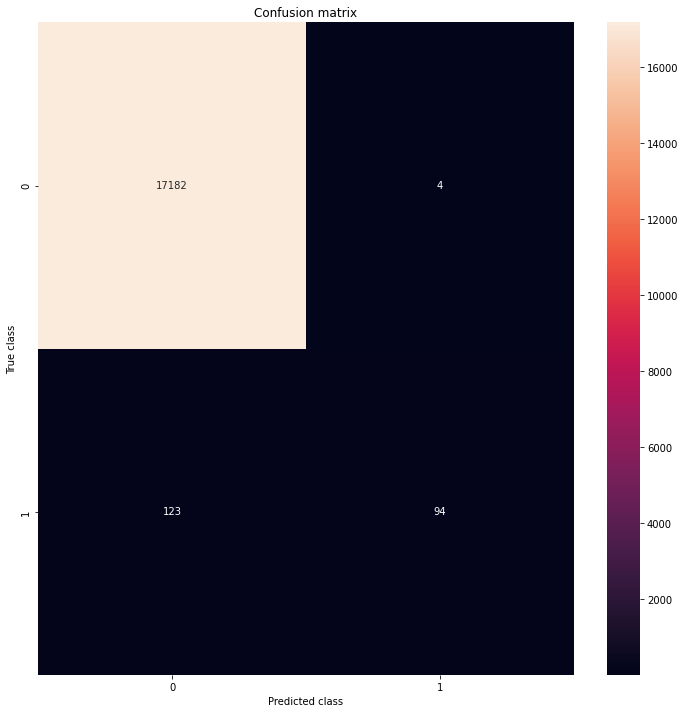

In [27]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 
plt.figure(figsize =(8, 8)) 
sns.heatmap(confusion_matrix_var, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 